# Corona Virus Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Shubham raj\Anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    --------------------------------------------



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda




Folium installed and imported!


## Symptoms of Corona Virus

In [3]:
symptoms={'Symptoms':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'Percentages':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))
symptoms


,Symptoms,Percentages
0,Fever,87.9
1,Dry cough,67.7
2,Fatigue,38.1
3,Sputum production,33.4
4,Shortness of breath,18.6
5,Muscle pain,14.8
6,Sore throat,13.9
7,Headache,13.6
8,Chills,11.4
9,Nausea or vomiting,5.0


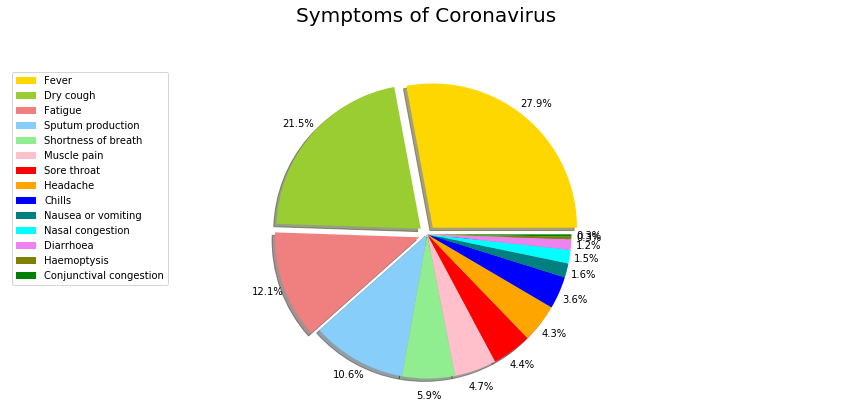

In [4]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red', 'orange','blue','teal','cyan','violet','olive','green']
explode_list = [0.06, 0.06, 0.06, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.figure(figsize=(15,6))    
plt.pie(symptoms['Percentages'],autopct='%1.1f%%',shadow=True,pctdistance=1.12,labels=None,colors=colors_list,
        explode=explode_list)
plt.title('Symptoms of Coronavirus',fontsize=20,y=1.12)
plt.axis('equal')
plt.legend(labels=symptoms.Symptoms, loc='upper left')
#plt.legend(symptoms['Symptoms'],loc=2)
plt.show();

## Number of Confirmed Corona Virus Cases and The Deceased Amongst Them

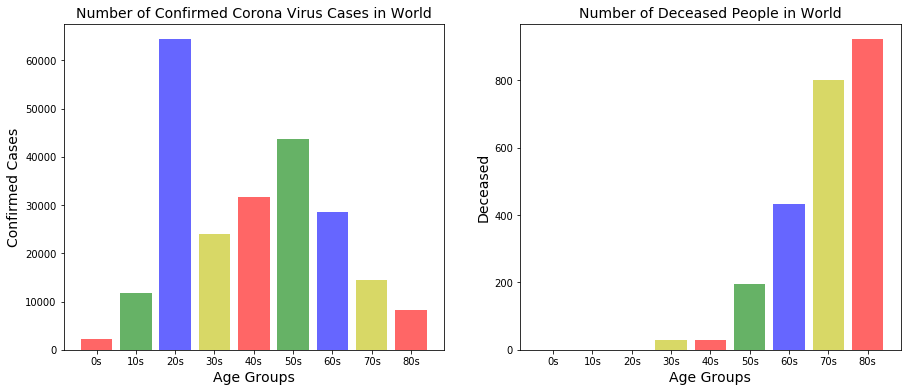

In [5]:
age_df = pd.read_csv('C:\\Users\\Shubham raj\\Desktop\Corona2/TimeAge.csv')
age_df = age_df[['age','confirmed','deceased']]
age_confirm = []
age_death = []
for i in range(9):  
    sum1 = 0;
    sum2 = 0;
    for ele in range(i,len(age_df),9):
        sum1 = sum1 + age_df.confirmed[ele]
        sum2 = sum2 + age_df.deceased[ele]
    age_confirm.append(sum1)
    age_death.append(sum2)
    
xval1 = range(9)
xval2 = range(9)
plt.figure(figsize=(15,6))
age_groups = ['0s','10s','20s','30s','40s','50s','60s','70s','80s']

plt.subplot(1,2,1)
plt.bar(xval1,age_confirm,color='rgby',alpha = 0.6)
plt.xticks(xval1,age_groups)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Confirmed Cases',fontsize=14)
plt.title('Number of Confirmed Corona Virus Cases in World',fontsize=14)

plt.subplot(1,2,2)
plt.bar(xval2,age_death,color='rgby', alpha = 0.6)
plt.xticks(xval1,age_groups)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Deceased',fontsize=14)
plt.title('Number of Deceased People in World',fontsize=14)

plt.show()


In [7]:
import warnings
warnings.filterwarnings('ignore')
patient_df = pd.read_csv('C:\\Users\\Shubham raj\\Desktop\Corona2/PatientInfo.csv')
patient_df['Age_exact'] = 2020 - patient_df['birth_year']
(patient_df.drop(['patient_id','global_num','city','disease','infection_case','infection_order',
                  'infected_by','contact_number','symptom_onset_date','country','province'],axis=1,inplace=True))
patient_df.confirmed_date = pd.to_datetime(patient_df.confirmed_date)
patient_df.released_date = pd.to_datetime(patient_df.released_date)
patient_df.deceased_date = pd.to_datetime(patient_df.deceased_date)
patient_df['released_days'] = patient_df['released_date']-patient_df['confirmed_date']
patient_df['deceased_days'] = patient_df['deceased_date']-patient_df['confirmed_date']

men_num = patient_df[patient_df.sex == 'male']
women_num = patient_df[patient_df.sex == 'female']
men_num2 = men_num[['Age_exact']]
men_num2 = men_num2.dropna(subset=['Age_exact'])
men_num2 = men_num2[men_num2.Age_exact > 0]

women_num2 = women_num[['Age_exact']]
women_num2 = women_num2.dropna(subset=['Age_exact'])
women_num2 = women_num2[women_num2.Age_exact > 0]


#RELEASED AND DECEASED AGE-WISE
state_released = patient_df[patient_df.state == 'released']
state_deceased = patient_df[patient_df.state == 'deceased']

#RELEASED AGE_WISE
state_released2 = state_released[['released_days']]
state_released2.dropna(inplace = True)
rel_days = []
#for line in list(map(state_released2['released_days'])):
#for line in (list(map(str,state_released2.iloc[:,0]))):
for line in list(map(str,state_released2.released_days)):
    k = line[:-14]
    k = int(k.rstrip())
    rel_days.append(k)
state_rel = pd.DataFrame(rel_days,columns = ['Released_Days'])
state_rel = state_rel[state_rel.Released_Days > 0]

#DECEASED AGE-WISE
state_deceased2 = state_deceased[['deceased_days']]
state_deceased2.dropna(inplace = True)
dec_days = []
for line in list(map(str,state_deceased2.deceased_days)):
    l = line[:-14]
    l = int(l.rstrip())
    dec_days.append(l)
state_dec = pd.DataFrame(dec_days,columns = ['Deceased_Days'])
state_dec = state_dec[state_dec.Deceased_Days > 0]

#RELEASED AND DECEASED GENDER_WISE
state_released_men = men_num[patient_df.state == 'released']
state_deceased_men = men_num[patient_df.state == 'deceased']
state_released_women = women_num[patient_df.state == 'released']
state_deceased_women = women_num[patient_df.state == 'deceased']


#RELEASED MEN
state_released_men2 = state_released_men[['released_days']]
state_released_men2.dropna(inplace = True)
rel_men_days = []
for line in list(map(str,state_released_men2.released_days)):
    m = line[:-14]
    m = int(m.rstrip())
    rel_men_days.append(m)
state_rel_men = pd.DataFrame(rel_men_days,columns = ['Released_Days'])
state_rel_men = state_rel_men[state_rel_men.Released_Days > 0]

#DECEASED MEN
state_deceased_men2 = state_deceased_men[['deceased_days']]
state_deceased_men2.dropna(inplace = True)
dec_men_days = []
for line in list(map(str,state_deceased_men2.deceased_days)):
    n = line[:-14]
    n = int(n.rstrip())
    dec_men_days.append(n)
state_dec_men = pd.DataFrame(dec_men_days,columns = ['Deceased_Days'])
state_dec_men = state_dec_men[state_dec_men.Deceased_Days > 0]

#RELEASED WOMEN
state_released_women2 = state_released_women[['released_days']]
state_released_women2.dropna(inplace = True)
rel_women_days = []
for line in list(map(str,state_released_women2.released_days)):
    p = line[:-14]
    p = int(p.rstrip())
    rel_women_days.append(p)
state_rel_women = pd.DataFrame(rel_women_days,columns = ['Released_Days'])
state_rel_women = state_rel_women[state_rel_women.Released_Days > 0]


#DECEASED WOMEN
state_deceased_women2 = state_deceased_women[['deceased_days']]
state_deceased_women2.dropna(inplace = True)
dec_women_days = []
for line in list(map(str,state_deceased_women2.deceased_days)):
    q = line[:-14]
    q = int(q.rstrip())
    dec_women_days.append(q)
state_dec_women = pd.DataFrame(dec_women_days,columns = ['Deceased_Days'])
state_dec_women = state_dec_women[state_dec_women.Deceased_Days > 0]


## Density Plot Showing Age Distribution of The Infected by Gender

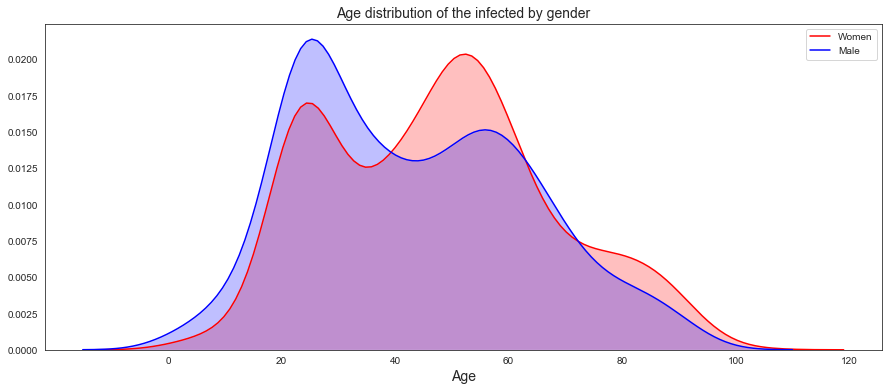

In [8]:
plt.figure(figsize=(15,6))
sns.set_style("white")
plt.title("Age distribution of the infected by gender",fontsize=14)
sns.kdeplot(women_num2['Age_exact'],label="Women",shade=True,kernel='gau',legend=True,color='r',shade_lowest=False)
sns.kdeplot(men_num2['Age_exact'],label="Male",shade=True,kernel='gau',legend=True,color='b',shade_lowest=False)
plt.xticks([0, 20, 40, 60, 80, 100, 120])
plt.legend()
#sns.jointplot(men_num2['Age_exact'],women_num2['Age_exact'],kind='kde',space=0)
plt.xlabel('Age',fontsize=14)
plt.show()

## Statistical Distribution Showing The Time Elapsed Before A Patient Was Released Among Different Age Groups

In [9]:
state_rel.describe()

,Released_Days
count,707.000000
mean,18.463932
std,6.510814
min,1.000000
25%,14.000000
50%,18.000000
75%,23.000000
max,37.000000


## Statistical Distribution Showing The Time Elapsed Before A Patient Died Among Different Age Groups

In [10]:
state_dec.describe()

,Deceased_Days
count,41.000000
mean,6.243902
std,4.673224
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,21.000000


## Scatter Plot Showing The Time Elapsed Before A Patient Was Released or Died Among Different Age Groups

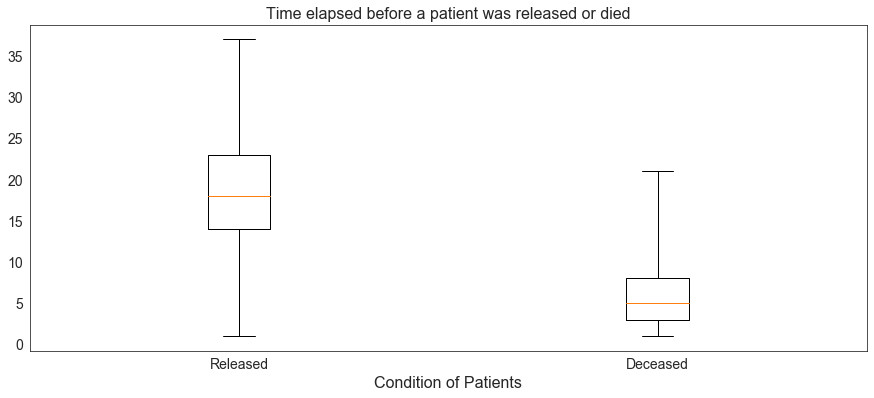

In [11]:
plt.figure(figsize=(15,6))
plt.boxplot([state_rel['Released_Days'],state_dec['Deceased_Days']],whis='range')
plt.title('Time elapsed before a patient was released or died',fontsize=16)
plt.xticks(np.arange(1,3),('Released', 'Deceased'),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Condition of Patients',fontsize=16)
plt.show();

## Statistical Distribution Showing The Time Elapsed Before A Male Patient Was Released

In [12]:
state_rel_men.describe()

,Released_Days
count,284.000000
mean,18.422535
std,6.779020
min,1.000000
25%,13.000000
50%,18.000000
75%,24.000000
max,37.000000


## Statistical Distribution Showing The Time Elapsed Before A Male Patient Died

In [13]:
state_dec_men.describe()

,Deceased_Days
count,28.000000
mean,6.107143
std,4.983969
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,21.000000


## Statistical Distribution Showing The Time Elapsed Before A Female Patient Was Released

In [14]:
state_rel_women.describe()

,Released_Days
count,422.000000
mean,18.509479
std,6.329335
min,4.000000
25%,14.000000
50%,18.000000
75%,23.000000
max,37.000000


## Statistical Distribution Showing The Time Elapsed Before A Female Patient Died

In [15]:
state_dec_women.describe()

,Deceased_Days
count,13.000000
mean,6.538462
std,4.095025
min,1.000000
25%,3.000000
50%,8.000000
75%,9.000000
max,13.000000


## Scatter Plot Showing The Time Elapsed Before A Patient Was Released Among Men and Women

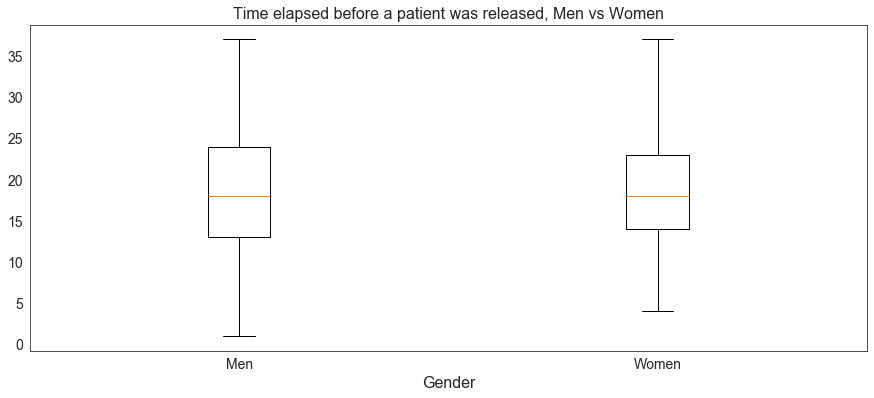

In [16]:
plt.figure(figsize=(15,6))
plt.boxplot([state_rel_men['Released_Days'],state_rel_women['Released_Days']],whis='range')
plt.title('Time elapsed before a patient was released, Men vs Women',fontsize=16)
plt.xticks(np.arange(1,3),('Men', 'Women'),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Gender',fontsize=16)
plt.show();

## Scatter Plot Showing The Time Elapsed Before A Patient Died Among Men and Women

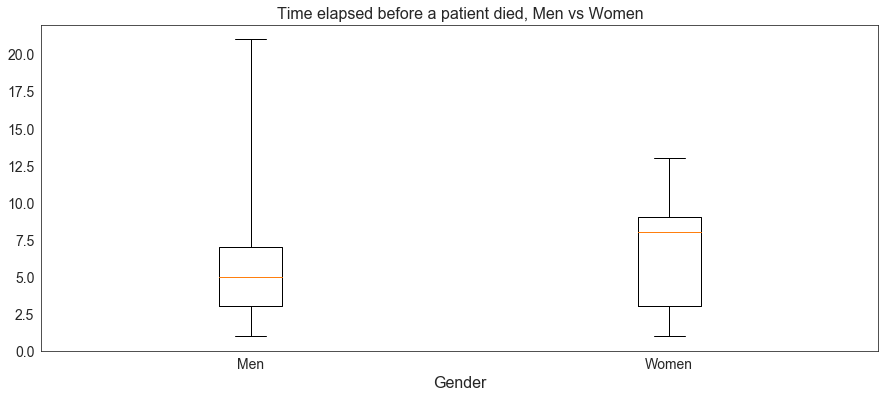

In [17]:
plt.figure(figsize=(15,6))
plt.boxplot([state_dec_men['Deceased_Days'],state_dec_women['Deceased_Days']],whis='range')
plt.title('Time elapsed before a patient died, Men vs Women',fontsize=16)
plt.xticks(np.arange(1,3),('Men', 'Women'),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Gender',fontsize=16)
plt.show();

In [18]:
from datetime import date
world_df = pd.read_csv('C:\\Users\\Shubham raj\\Desktop\Corona2/covid_19_data.csv')
world_df = world_df.rename(columns = {'Province/State':'Province','Country/Region':'Country'})

## Current Condition of Patients

In [19]:
world_df1 = world_df[['Confirmed','Deaths','Recovered']]
people_infected = np.sum(world_df1.Confirmed)
people_dead = np.sum(world_df1.Deaths)
people_recovered = np.sum(world_df1.Recovered)
people_isolated = people_infected - people_dead - people_recovered
rec = people_recovered/people_infected
dec = people_dead/people_infected
iso = people_isolated/people_infected
curr_cond = [iso*100,rec*100,dec*100]

print("Percentage Recovered = {}% ".format(rec*100))
print("Percentage Deceased = {}%".format(dec*100))
print("Percentage Isolated = {}%".format(iso*100))

Percentage Recovered = 26.214161217204722% 
Percentage Deceased = 4.507984788043387%
Percentage Isolated = 69.2778539947519%


## Bar Graph Showing Current Condition of Patients

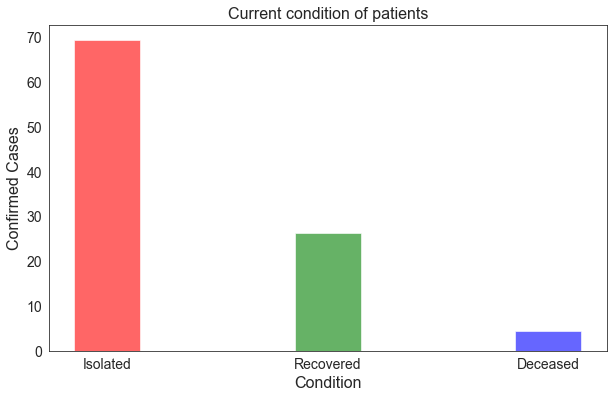

In [20]:
plt.figure(figsize=(10,6))
xvals = range(3)
plt.bar(xvals,curr_cond,width=0.3,color='rgb',alpha=0.6)
plt.xlabel('Condition', fontsize=16)
plt.ylabel('Confirmed Cases',fontsize=16)
plt.title('Current condition of patients',fontsize=16)
cond_groups = ['Isolated','Recovered','Deceased']
plt.xticks(xvals,cond_groups,fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [21]:
world_df['Country'].replace({'Mainland China':'China'},inplace=True)
world_df['Date'] = world_df['ObservationDate'].apply(pd.to_datetime)
world_df.drop(['SNo'],axis=1,inplace=True)

In [22]:
d = world_df['Date'][-1:].astype('str')
year = int(d.values[0].split('-')[0])
month = int(d.values[0].split('-')[1])
day = int(d.values[0].split('-')[2].split()[0])
world_df_new = world_df[world_df['Date'] >= pd.Timestamp(date(year,month,day))]
#world_df.head()

In [23]:
world_coords = pd.read_csv('C:\\Users\\Shubham raj\\Desktop\Corona/world_coordinates.csv')

## Current Situation of The World

In [35]:
Number_of_countries = len(world_df_new['Country'].value_counts())
cases = pd.DataFrame(world_df_new.groupby('Country')['Confirmed','Deaths','Recovered'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,Number_of_countries+1)

global_cases = cases[['Country','Confirmed','Deaths','Recovered']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases

,Country,Confirmed,Deaths,Recovered
1,Afghanistan,349.0,7.0,15.0
2,Albania,361.0,20.0,104.0
3,Algeria,1320.0,152.0,90.0
4,Andorra,501.0,18.0,26.0
5,Angola,14.0,2.0,2.0
...,...,...,...,...
181,Vietnam,241.0,0.0,90.0
182,West Bank and Gaza,237.0,1.0,25.0
183,Western Sahara,4.0,0.0,0.0
184,Zambia,39.0,1.0,3.0


In [36]:
world_data = pd.merge(world_coords,global_cases,on='Country')
world_data.head()

,Code,Country,latitude,longitude,Confirmed,Deaths,Recovered
0,AD,Andorra,42.546245,1.601554,501.0,18.0,26.0
1,AE,United Arab Emirates,23.424076,53.847818,1799.0,10.0,144.0
2,AF,Afghanistan,33.939110,67.709953,349.0,7.0,15.0
3,AG,Antigua and Barbuda,17.060816,-61.796428,15.0,0.0,0.0
4,AL,Albania,41.153332,20.168331,361.0,20.0,104.0


## Worldmap Showing Total Confirmed Cases

In [38]:
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['latitude'], world_data['longitude'], world_data['Confirmed'], world_data['Country']):
    folium.features.CircleMarker([lat, lon], radius=10, popup = ('<strong>Country</strong>: ' + str(name) + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'), color='yellow',fill=True
                                 ,fill_color='green',fill_opacity=0.7).add_to(world_map)
world_map

## Worldmap Showing Total Deaths

In [39]:
world_map1 = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['latitude'], world_data['longitude'], world_data['Deaths'], world_data['Country']):
    folium.features.CircleMarker([lat, lon], radius=10, popup = ('<strong>Country</strong>: ' + str(name) + '<br>'
                                '<strong>Deaths</strong>: ' + str(value) + '<br>'), color='red',fill=True
                                 ,fill_color='red',fill_opacity=0.7).add_to(world_map1)
world_map1

## Worldmap Showing Total Recovered Cases

In [41]:
world_map2 = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['latitude'], world_data['longitude'], world_data['Recovered'], world_data['Country']):
    folium.features.CircleMarker([lat, lon], radius=10, popup = ('<strong>Country</strong>: ' + str(name) + '<br>'
                                '<strong>Recovered Cases:</strong>: ' + str(value) + '<br>'), color='green',fill=True
                                 ,fill_color='green',fill_opacity=0.7).add_to(world_map2)
world_map2